# Step 2: Process and Explore NDVI (Normalized Difference Vegetation Index)

## What is NDVI?

NDVI (Normalized Difference Vegetation Index) is a satellite-derived measure of vegetation health.  
It is calculated using the red and near-infrared (NIR) bands of satellite imagery:

**NDVI = (NIR - Red) / (NIR + Red)**

- **High NDVI values** (~0.6 to 1.0) indicate dense, healthy vegetation (e.g., forests, crops).
- **Low NDVI values** (~0.0 to 0.2) suggest sparse vegetation, built-up areas, or bare ground.

NDVI is widely used in environmental monitoring, urban planning, agriculture, and climate resilience.

---

## What This Notebook Does

- Loads a Sentinel-2-based NDVI GeoTIFF file downloaded from Google Earth Engine.
- Visualizes the NDVI across the Kawempe region of Kampala, Uganda.
- Calculates basic statistics and distribution of vegetation health.
- Prepares the NDVI layer for integration with other vulnerability indicators (e.g., infrastructure, population, services).

This step is part of the **Urban Risk Pipeline**, providing environmental context that supports disaster relief planning and urban vulnerability assessment.


In [1]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np


### Load NDVI GeoTIFF file

The file was generated in Google Earth Engine and downloaded manually. We'll use `rasterio` to read it.


In [2]:
ndvi_path = "../data/raw/Kawempe_NDVI_2023.tif"  # Adjust path if needed

with rasterio.open(ndvi_path) as src:
    ndvi = src.read(1)  # read first band
    profile = src.profile
    ndvi_bounds = src.bounds
    crs = src.crs

print("NDVI shape:", ndvi.shape)
print("CRS:", crs)


NDVI shape: (669, 1114)
CRS: EPSG:4326


### NDVI Raster Details

- **Shape**: 669 rows × 1114 columns  
  → This means the raster contains 745,266 pixels in total, each representing an NDVI value for a small area of Kawempe.

- **Coordinate Reference System (CRS)**:  
  `EPSG:4326` — a geographic coordinate system that uses **latitude and longitude in degrees** (WGS 84).  
  This is compatible with OpenStreetMap data and allows easy overlay with roads, buildings, and services.

- **Use in Analysis**:  
  The NDVI raster is now aligned with the infrastructure layers and can be used for:
  - Vegetation mapping
  - Environmental vulnerability scoring
  - Zonal or grid-based analysis (e.g., mean NDVI per neighborhood)


### Visualize NDVI Raster

We apply a green-to-brown colormap, where green shows healthy vegetation and brown shows built-up or sparse vegetation.


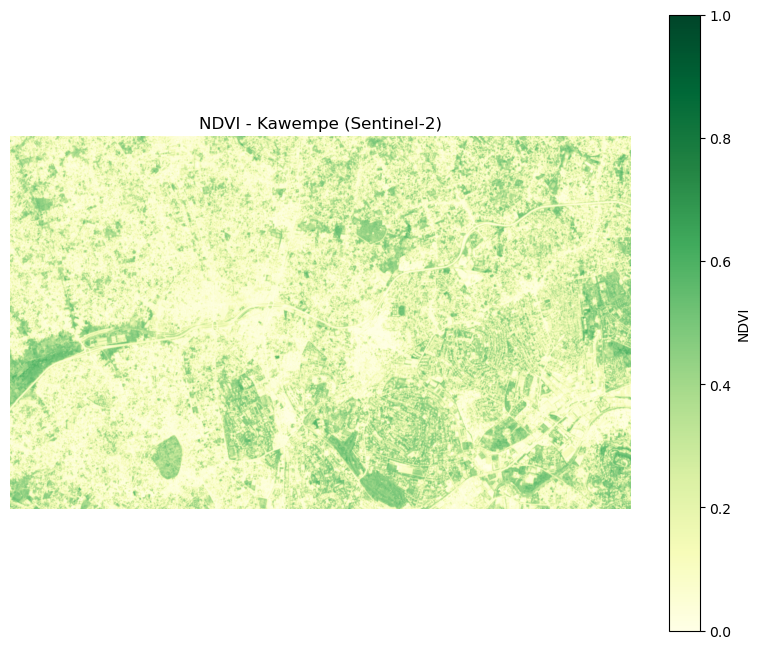

In [3]:
plt.figure(figsize=(10, 8))
plt.imshow(ndvi, cmap='YlGn', vmin=0, vmax=1)
plt.colorbar(label="NDVI")
plt.title("NDVI - Kawempe (Sentinel-2)")
plt.axis("off")
plt.show()


### NDVI Summary Statistics

We calculate the mean, median, and standard deviation of NDVI values (ignoring no-data regions).


In [4]:
ndvi_clean = ndvi[ndvi > 0]  # exclude nodata/zero areas

print("Mean NDVI:", np.mean(ndvi_clean))
print("Median NDVI:", np.median(ndvi_clean))
print("Standard Deviation:", np.std(ndvi_clean))


Mean NDVI: 0.19427559
Median NDVI: 0.1618541
Standard Deviation: 0.13053134


### NDVI Summary Statistics

- **Mean NDVI: 0.194**
  - This is the average NDVI across all pixels in the Kawempe area.
  - A value of 0.19 suggests that most of the region has **low vegetation cover**, which is typical for urban or semi-urban zones.
    

- **Median NDVI: 0.162**
  - This is the middle NDVI value — half the pixels are below 0.162 and half are above.
  - Since the median is close to the mean, the distribution is fairly symmetric, but still **skewed slightly toward low NDVI**.
    

- **Standard Deviation: 0.131**
  - This measures how spread out the NDVI values are.
  - A value of 0.13 indicates **moderate variation** in vegetation across the region — some areas with greenery, many with little or none.
    

#### Interpretation:
Most of Kawempe is **built-up or sparsely vegetated**, with pockets of higher NDVI. This baseline helps identify zones with low vegetation, which may correlate with heat vulnerability, poor drainage, or limited access to green space — key indicators in urban risk assessments.


### Histogram of NDVI Values

This helps us understand the distribution of vegetation cover across Kawempe.


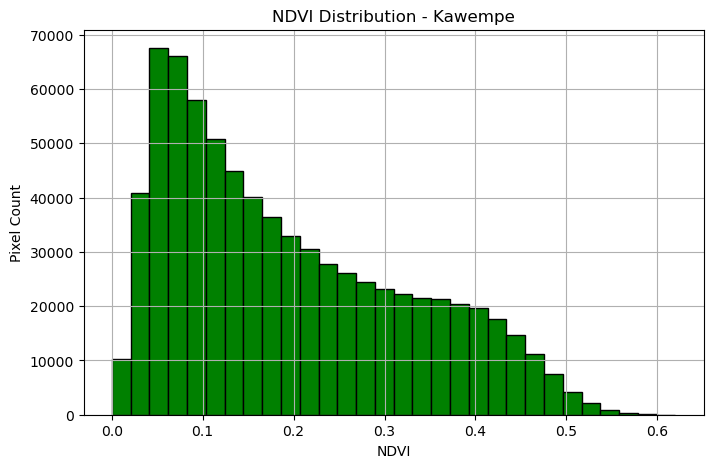

In [6]:
plt.figure(figsize=(8, 5))
plt.hist(ndvi_clean.flatten(), bins=30, color='green', edgecolor='black')
plt.title("NDVI Distribution - Kawempe")
plt.xlabel("NDVI")
plt.ylabel("Pixel Count")
plt.grid(True)
plt.show()


### Is Kawempe a Good Area for NDVI-Based Risk Analysis?

Yes. The low NDVI mean and median values confirm that Kawempe is a heavily built-up area with limited vegetation cover. This makes it a relevant and impactful choice for studying urban vulnerability, as lack of green cover is often correlated with heat risk, poor drainage, and limited environmental resilience. The observed variation in NDVI further supports analysis of sub-zonal differences in exposure and vulnerability.
